In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv ('/content/Dataset/Social_Network_Ads.csv')
df

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0
...,...,...,...,...
395,15691863,46,41000,1
396,15706071,51,23000,1
397,15654296,50,20000,1
398,15755018,36,33000,0


In [3]:
df.isna().sum()

User ID            0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# Visualisasi Data

In [4]:
# Drop User ID
df.drop(columns = ['User ID'], inplace = True)

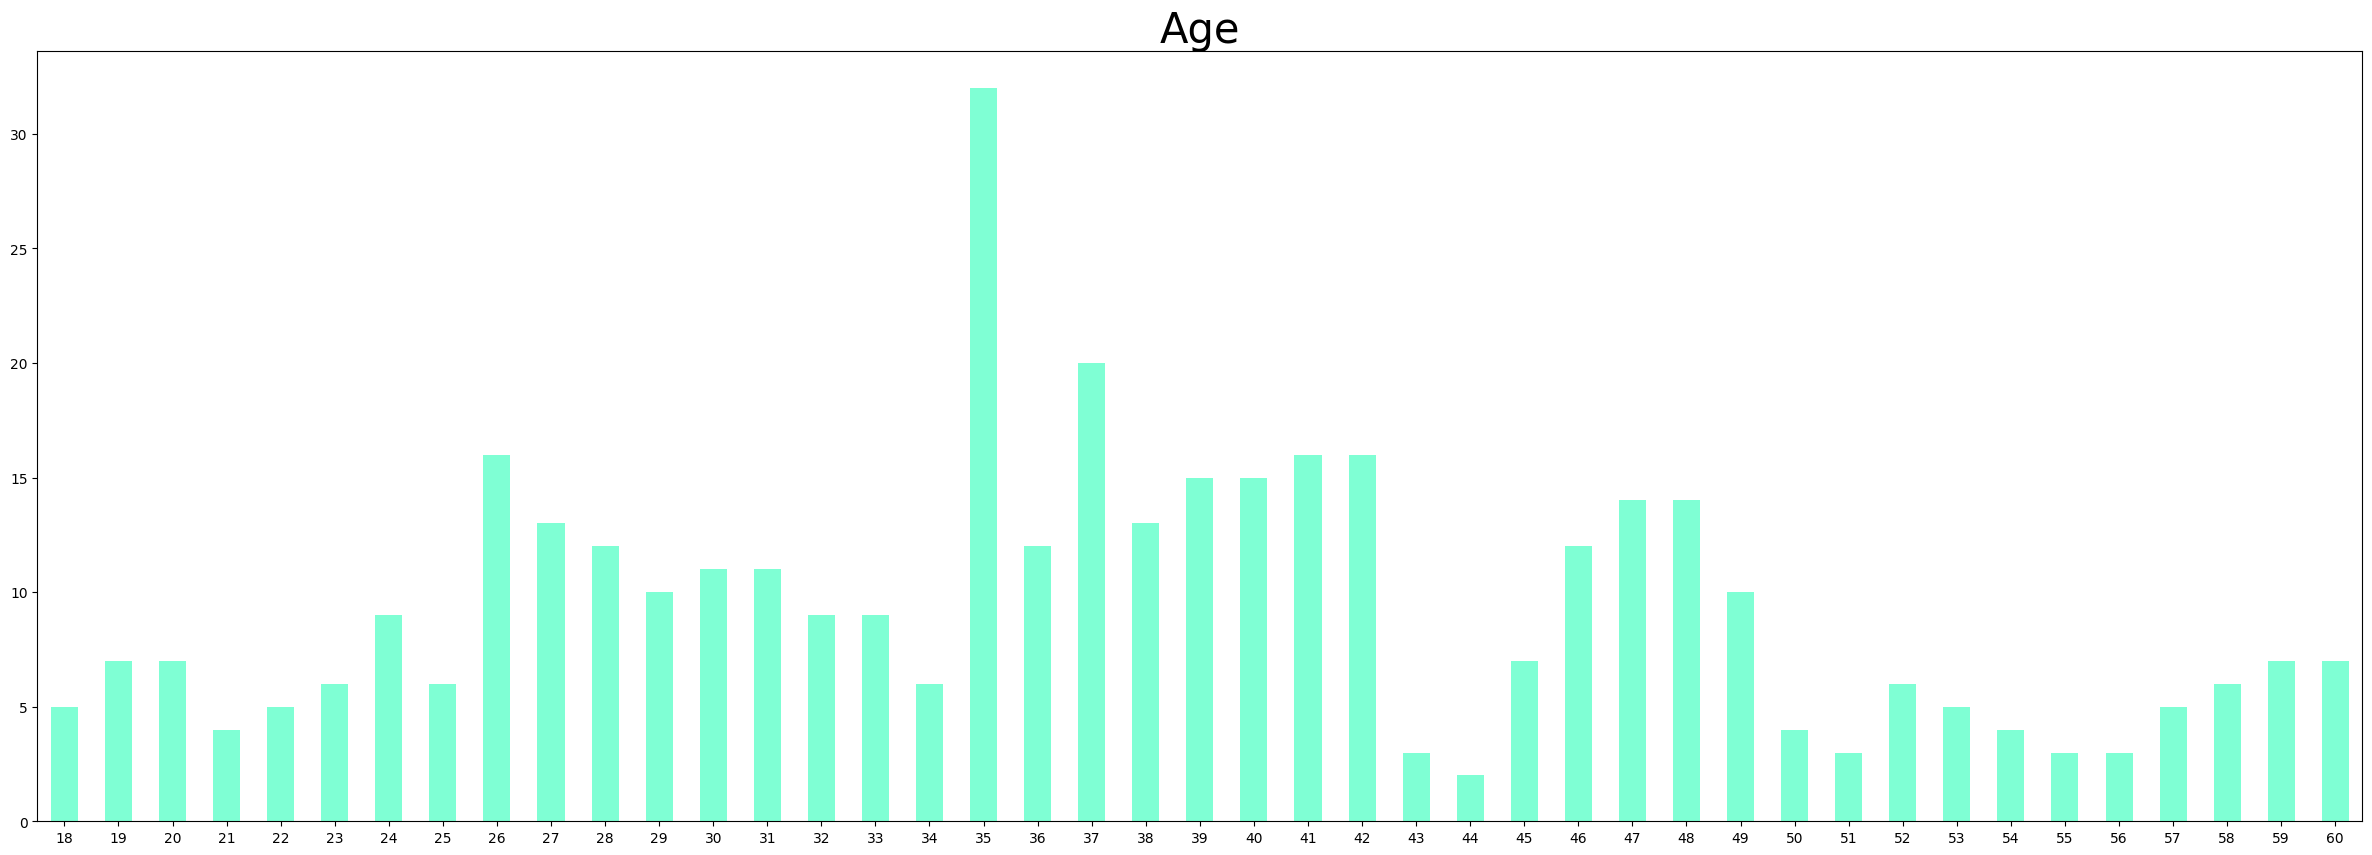

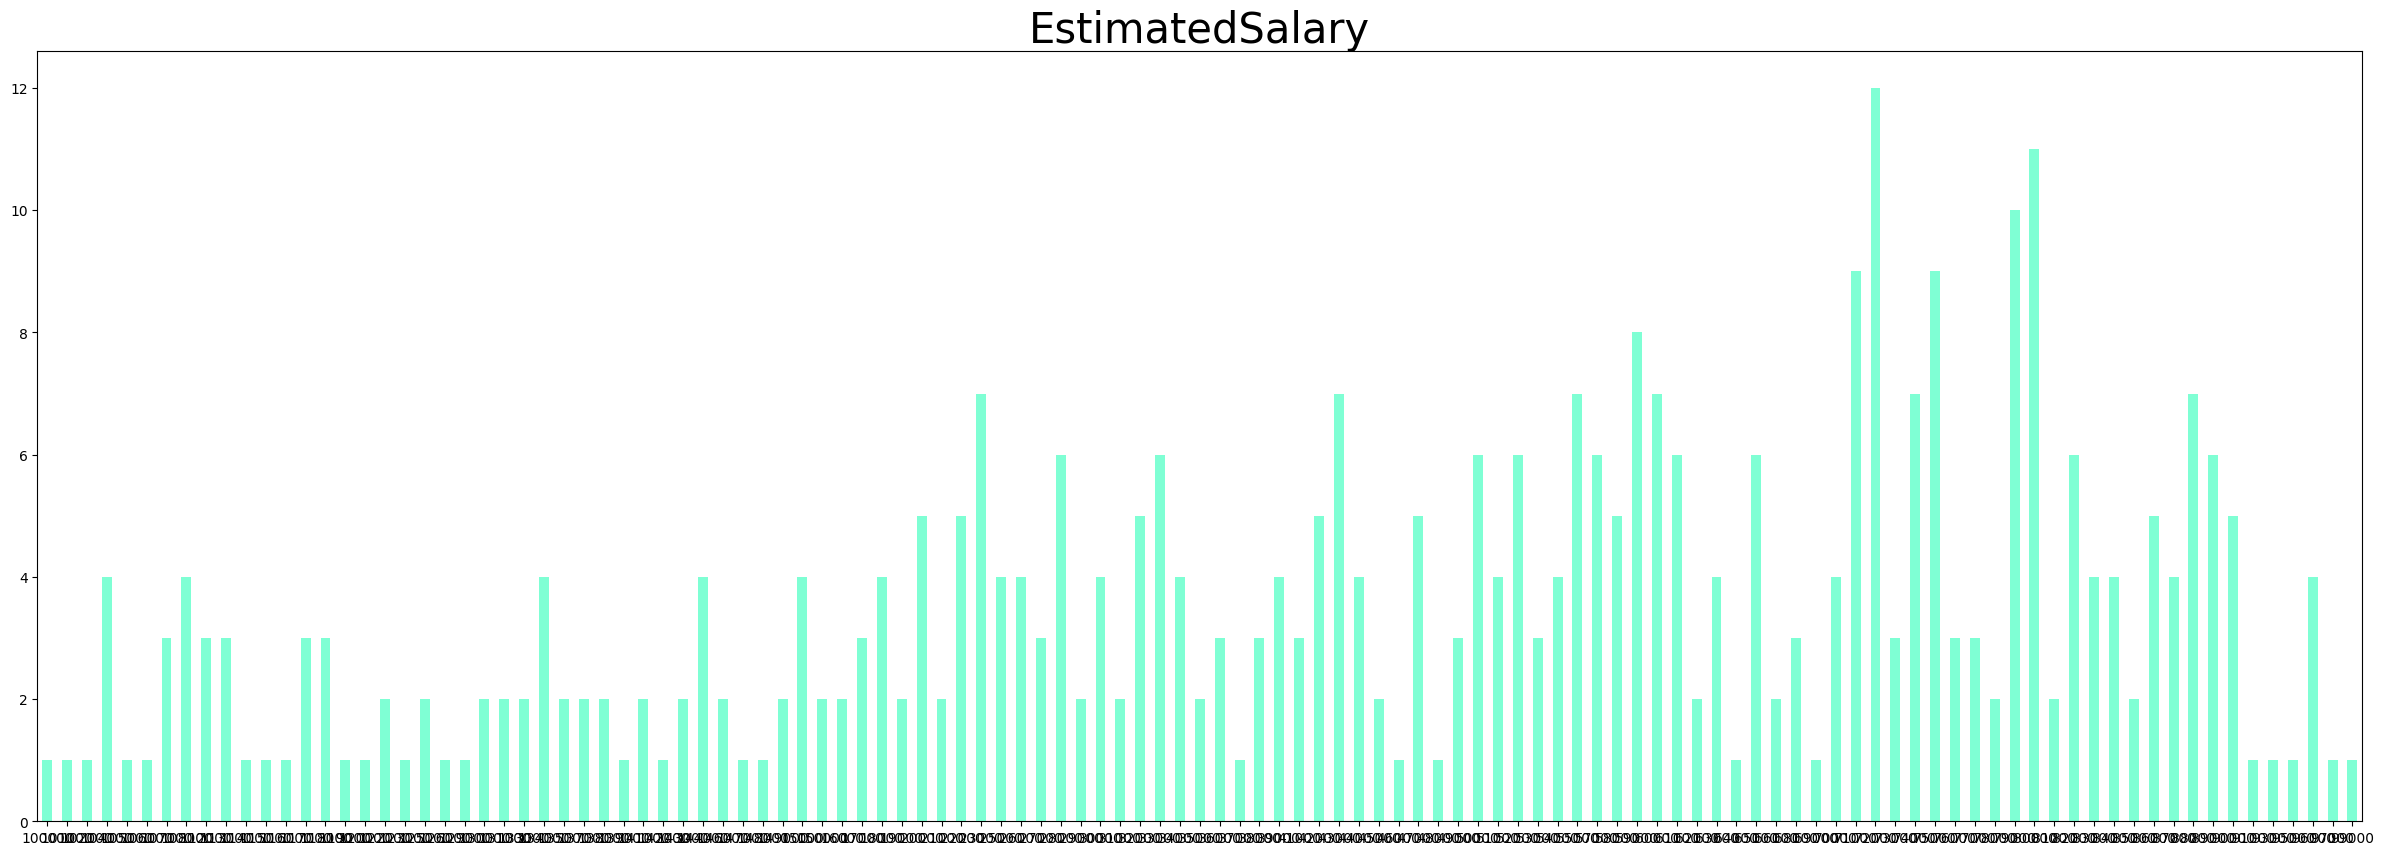

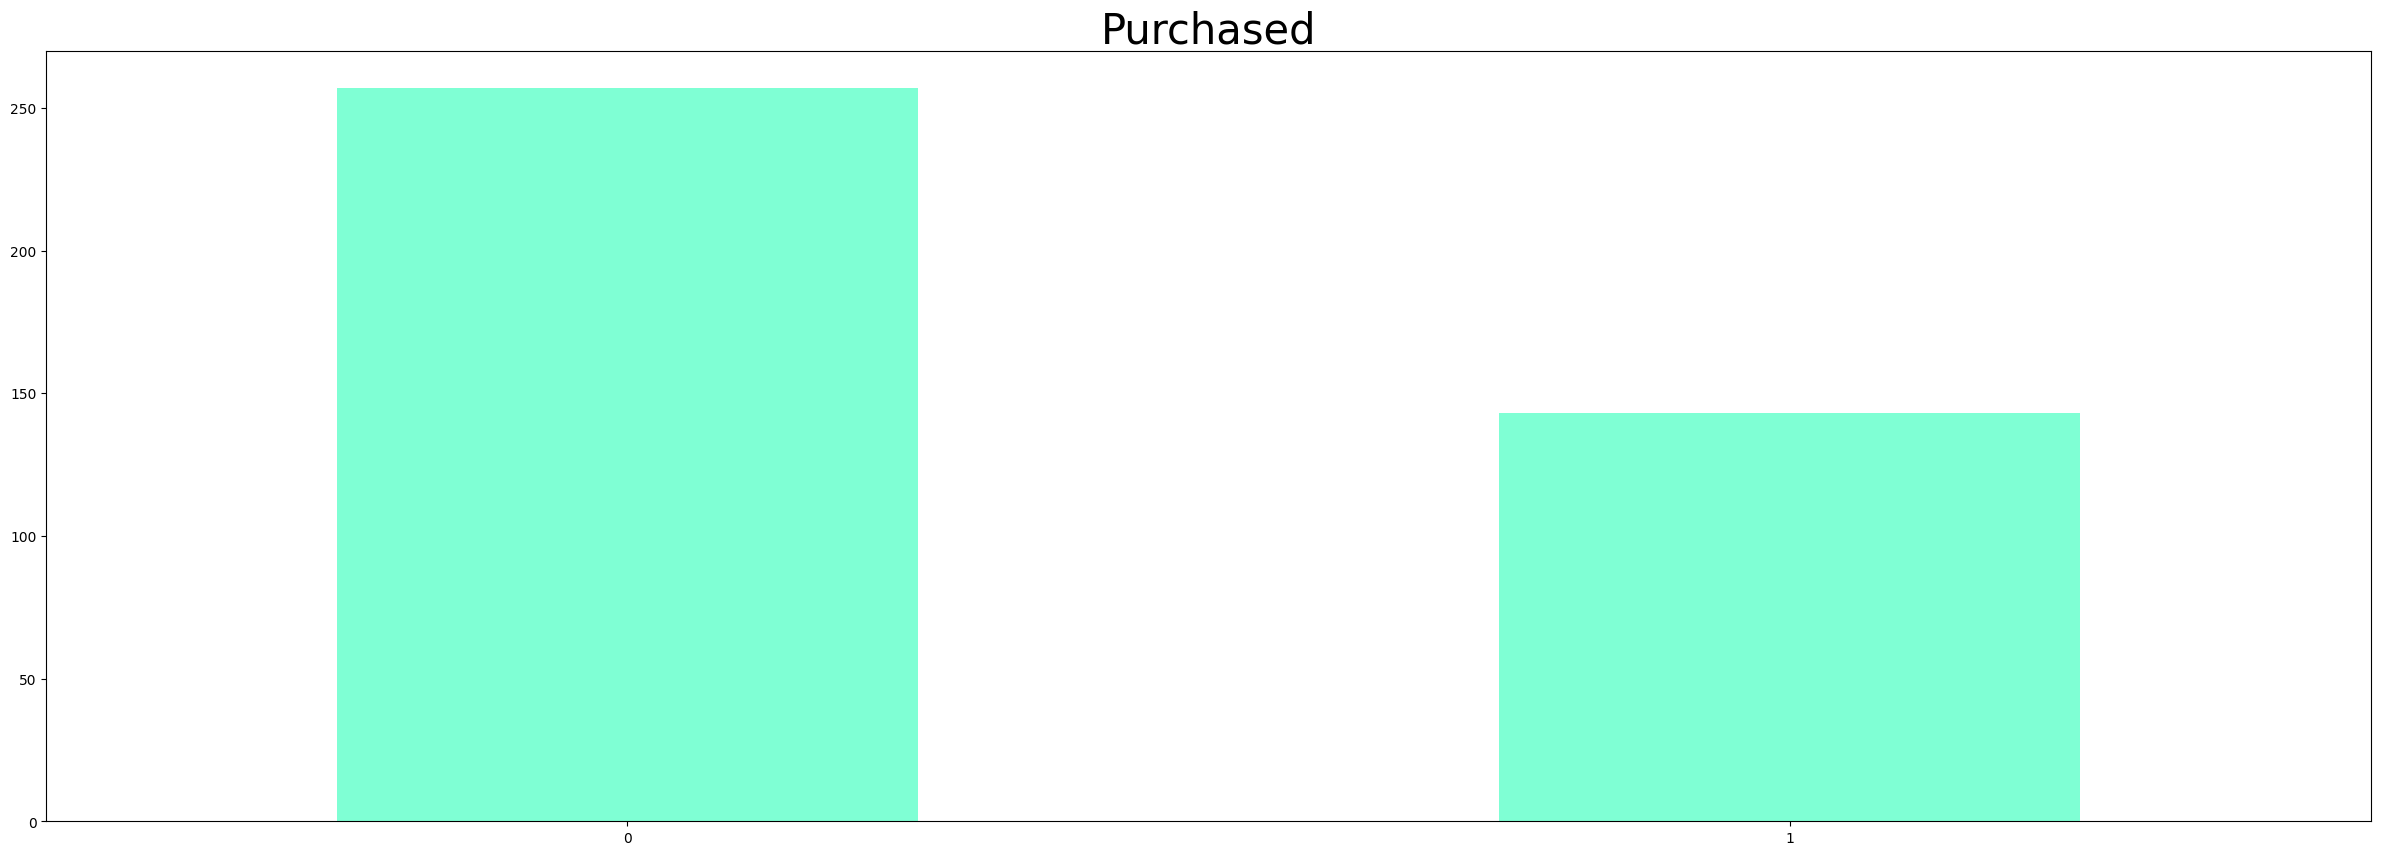

In [5]:
df_train_object = df
df_train_object = df_train_object.astype(str)
df_train_object.replace(np.nan, 'Nan', inplace=True)

# def get_cmap(n, name='hsv'):
#     return plt.cm.get_cmap(name, n)

# cmap = get_cmap(len(features_data.columns))

for col in df_train_object:
    plt.figure(figsize=(30,10))
    plt.title(col, fontsize = 30)
    df_train_object[col].value_counts().sort_index().plot(kind= 'bar', rot = 0, color = 'aquamarine')
    plt.show()

In [6]:
X = df.drop(columns = ['Purchased'])
Y = df['Purchased']

# XGBOOST

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
xgb = XGBClassifier()

X = df.drop(columns = ['Purchased'])
Y = df['Purchased']
# {'reg_lambda': 0, 'reg_alpha': 12.8, 'n_estimators': 80, 'max_depth': 5, 'learning_rate': 0.25, 'gamma': 0.8}
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
xgb.set_params(tree_method='gpu_hist')
xgb.set_params(reg_lambda = 0)
xgb.set_params(reg_alpha = 12.8)
xgb.set_params(n_estimators = 80)
xgb.set_params(max_depth = 5)
xgb.set_params(learning_rate = 0.25)
xgb.set_params(gamma = 0.8)

xgb.fit(X_train, y_train)
prediction = xgb.predict(X_test)

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        72
           1       0.85      0.92      0.88        48

    accuracy                           0.90       120
   macro avg       0.89      0.90      0.90       120
weighted avg       0.90      0.90      0.90       120



In [ ]:
import time
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from skopt import BayesSearchCV
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix,roc_curve

# LGBM

In [ ]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)
prediction=clf.predict(X_test)

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        72
           1       0.81      0.79      0.80        48

    accuracy                           0.84       120
   macro avg       0.84      0.83      0.83       120
weighted avg       0.84      0.84      0.84       120



# Hist Gradient

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

classifier =  HistGradientBoostingClassifier()
classifier.fit(X_train,y_train)
prediction = classifier.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89        72
           1       0.86      0.79      0.83        48

    accuracy                           0.87       120
   macro avg       0.87      0.85      0.86       120
weighted avg       0.87      0.87      0.87       120



# Hyperparameter Tuning

In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 10.8 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBClassifier
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
xgb.set_params(tree_method='gpu_hist')
folds = 3
param_comb = 5

# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
# X = idris_ganteng
# Y = label_data['h1n1_vaccine']

random_search = RandomizedSearchCV(xgb, param_distributions=param_grid, n_iter=param_comb, scoring='roc_auc', n_jobs=4, verbose=3, random_state=1001 )
random_search.fit(X, Y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[17:49:57] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=0.02...
                                                  102.4, 200],
                                        'learning_rate': [0.01, 0.03, 0.06, 0.1,
                                                          0.15, 0.2, 0.25,
                                                          0.300000012, 0.4, 0.5,
                                                          0.6, 0.7],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14],
                                        'n_estimators': [50, 65, 80, 100, 115,
                                                         130, 150],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4, 0.8,
                                                      1.6, 3.2, 6.4, 12.8, 25.6,
                                                      51.2, 102.4, 200],
                                        'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8,
                                                       1.6, 3.2, 6.4, 12.8,
                                                       25.6, 51.2, 102.4,
                                                       200]},
                   random_state=1001, scoring='roc_auc', verbose=3)

In [ ]:
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best hyperparameters:
{'reg_lambda': 0, 'reg_alpha': 12.8, 'n_estimators': 80, 'max_depth': 5, 'learning_rate': 0.25, 'gamma': 0.8}


# Feature Scaling

In [7]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [8]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(X)
X_new = pt.transform(X)
X_new = pd.DataFrame(X_new, columns = X.keys())
X_new

,Age,EstimatedSalary
0,-1.975163,-1.809251
1,-0.190160,-1.752548
2,-1.132265,-0.725702
3,-1.020842,-0.246494
4,-1.975163,0.311281
...,...,...
395,0.818988,-0.800705
396,1.239930,-1.591062
397,1.157342,-1.752548
398,-0.092823,-1.122420


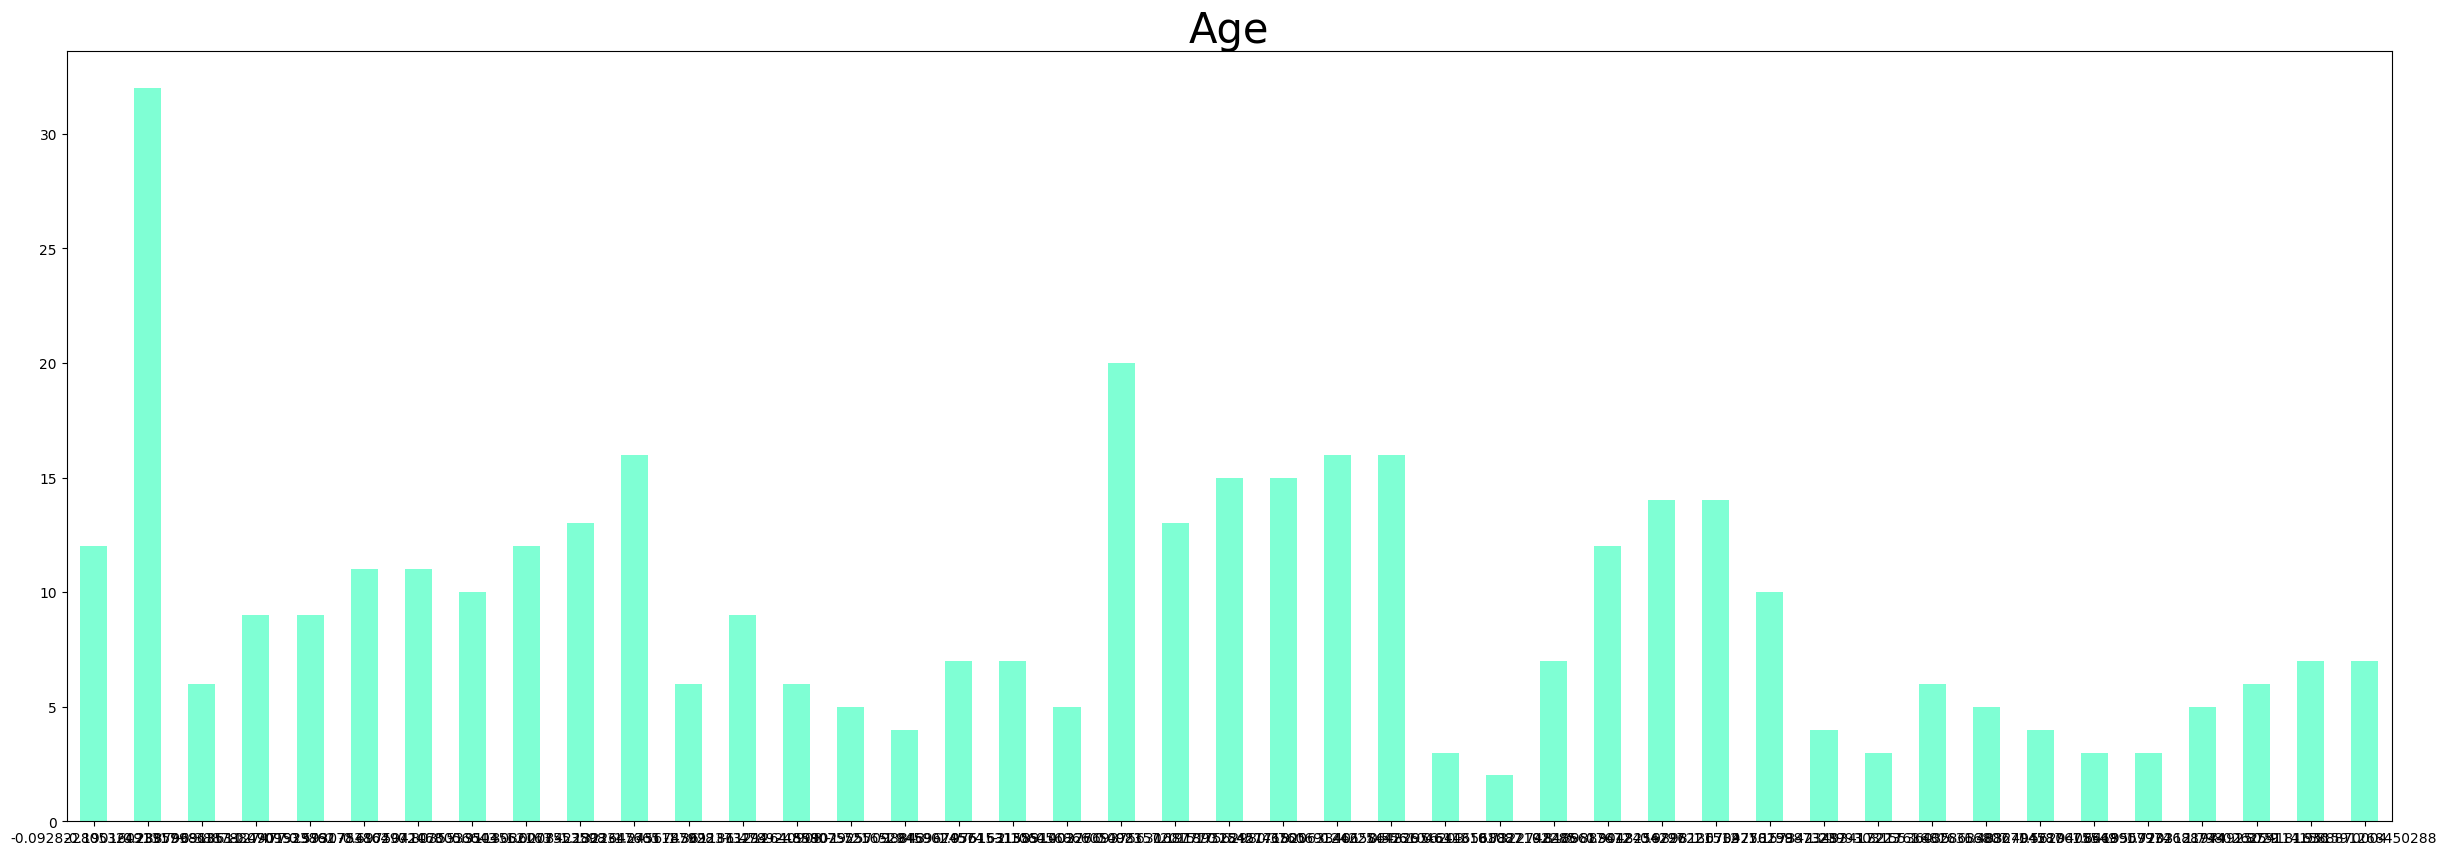

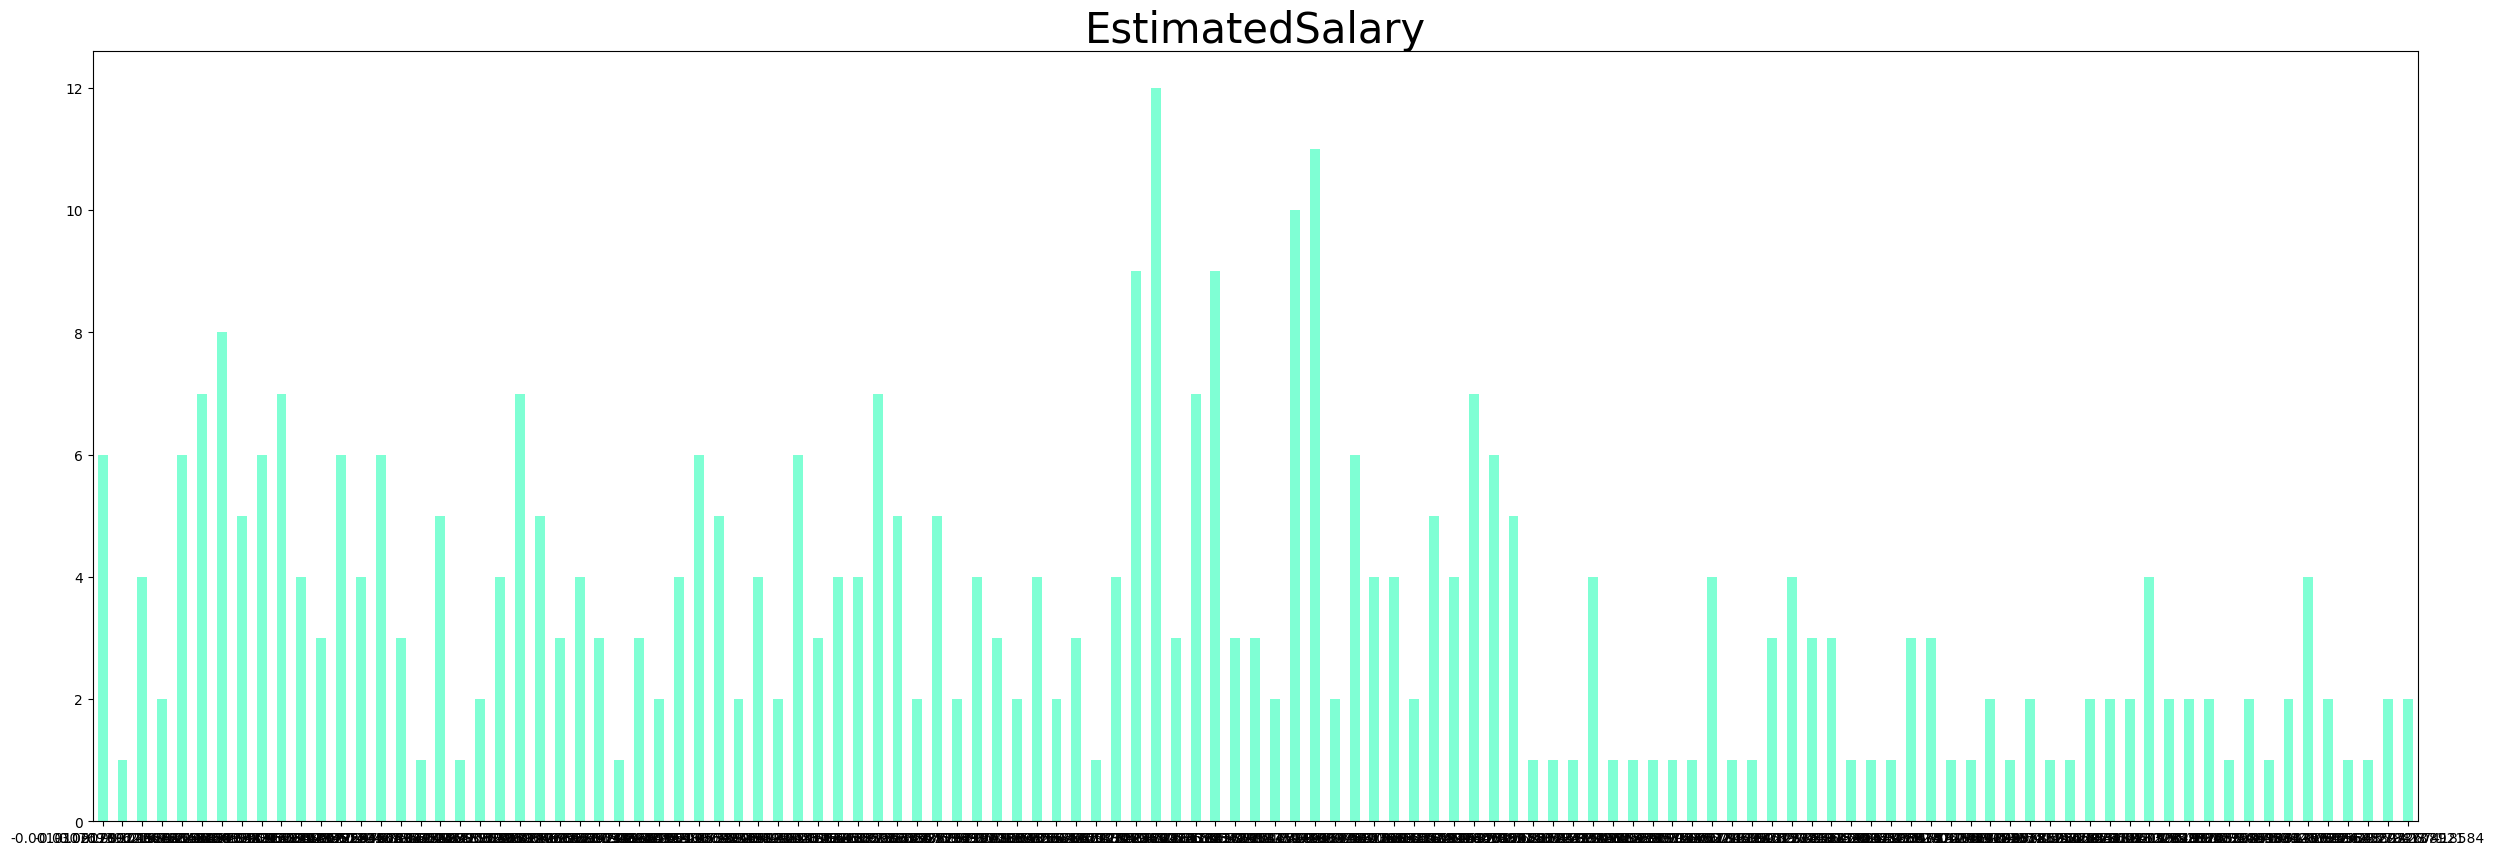

In [9]:
df_train_object = X_new
df_train_object = df_train_object.astype(str)
df_train_object.replace(np.nan, 'Nan', inplace=True)

# def get_cmap(n, name='hsv'):
#     return plt.cm.get_cmap(name, n)


# cmap = get_cmap(len(features_data.columns))

for col in df_train_object:
    plt.figure(figsize=(30,10))
    plt.title(col, fontsize = 30)
    df_train_object[col].value_counts().sort_index().plot(kind= 'bar', rot = 0, color = 'aquamarine')
    plt.show()

# Naive Bayes Classifier

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Build a Gaussian Classifier
model = GaussianNB()
model.set_params(var_smoothing = 1e-05)
model.set_params(priors = None)

X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.3, random_state = 42)

# Model training
model.fit(X_train, y_train)
prediction = model.predict(X_test)

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        73
           1       0.95      0.83      0.89        47

    accuracy                           0.92       120
   macro avg       0.92      0.90      0.91       120
weighted avg       0.92      0.92      0.92       120



# Confussion Matrix

<Axes: >

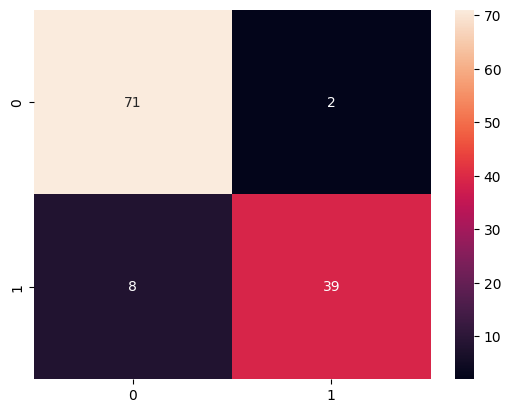

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, prediction), annot = True, fmt = '.0f')

#Hyperparameter Gaussian NB

In [12]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05],
    'priors': [None, [0.2, 0.3, 0.5], [0.25, 0.25, 0.5]]
}

random_opt = RandomizedSearchCV(model, param_grid, cv=stratified_cv, scoring='accuracy')

random_opt.fit(X_train, y_train)
print("Hyperparameter terbaik:", random_opt.best_params_)

# Mengevaluasi model pada set pengujian
accuracy = random_opt.score(X_test, y_test)
print("Akurasi model terbaik:", accuracy)

Hyperparameter terbaik: {'var_smoothing': 1e-08, 'priors': None}
Akurasi model terbaik: 0.9166666666666666
